In [114]:
#https://github.com/aswintechguy/Deep-Learning-Projects/blob/main/Facial%20Emotion%20Recognition%20-%20Image%20Classification/Facial%20Emotion%20Recognition%20-%20Multi%20Classification.ipynb

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [6]:
TRAIN_DIR = r'C:\Users\arain\Desktop\archive (1)\train\train/'
TEST_DIR = r'C:\Users\arain\Desktop\archive (1)\test\test/'


In [8]:
def load_dataset(directory):
    image_paths = []
    labels = []
    
    for label in os.listdir(directory):
        for filename in os.listdir(directory+label):
            image_path = os.path.join(directory, label, filename)
            image_paths.append(image_path)
            labels.append(label)
            
        print(label, "Completed")
        
    return image_paths, labels


In [10]:
## convert into dataframe
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)
# shuffle
train = train.sample(frac=1).reset_index(drop=True)
train.head()


angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed


,image,label
0,C:\Users\arain\Desktop\archive (1)\train\train...,surprise
1,C:\Users\arain\Desktop\archive (1)\train\train...,happy
2,C:\Users\arain\Desktop\archive (1)\train\train...,happy
3,C:\Users\arain\Desktop\archive (1)\train\train...,fear
4,C:\Users\arain\Desktop\archive (1)\train\train...,angry


In [11]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR)
test.head()

angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed


,image,label
0,C:\Users\arain\Desktop\archive (1)\test\test/a...,angry
1,C:\Users\arain\Desktop\archive (1)\test\test/a...,angry
2,C:\Users\arain\Desktop\archive (1)\test\test/a...,angry
3,C:\Users\arain\Desktop\archive (1)\test\test/a...,angry
4,C:\Users\arain\Desktop\archive (1)\test\test/a...,angry


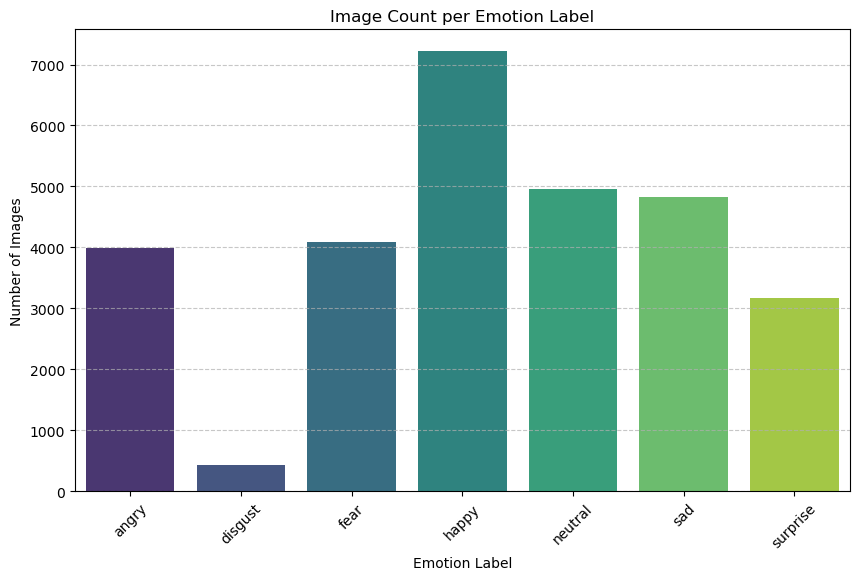

In [50]:
# Count images in each subfolder (representing labels)
labels = []
counts = []

for label in os.listdir(TRAIN_DIR):
    label_path = os.path.join(TRAIN_DIR, label)
    if os.path.isdir(label_path): 
        num_images = len(os.listdir(label_path))
        labels.append(label)
        counts.append(num_images)

# Create a DataFrame for plotting
data = pd.DataFrame({
    'Label': labels,
    'Count': counts
})


plt.figure(figsize=(10, 6))
sns.barplot(x='Label', y='Count', data=data, palette='viridis')
plt.title('Image Count per Emotion Label')
plt.xlabel('Emotion Label')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [52]:
for label in os.listdir(TRAIN_DIR):
    label_path = os.path.join(TRAIN_DIR, label)
    if os.path.isdir(label_path):
        num_images = sum(1 for file in os.listdir(label_path) if file.endswith(('.jpg', '.png', '.jpeg')))
        labels.append(label)
        counts.append(num_images)

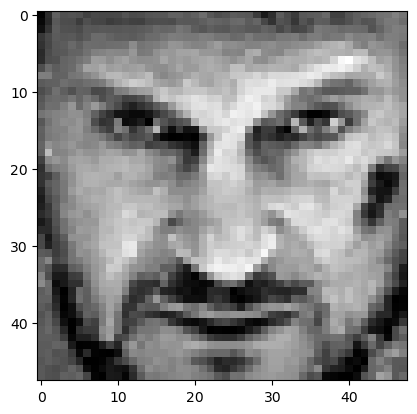

In [54]:
from PIL import Image
img = Image.open(train['image'][0])
plt.imshow(img, cmap='gray');

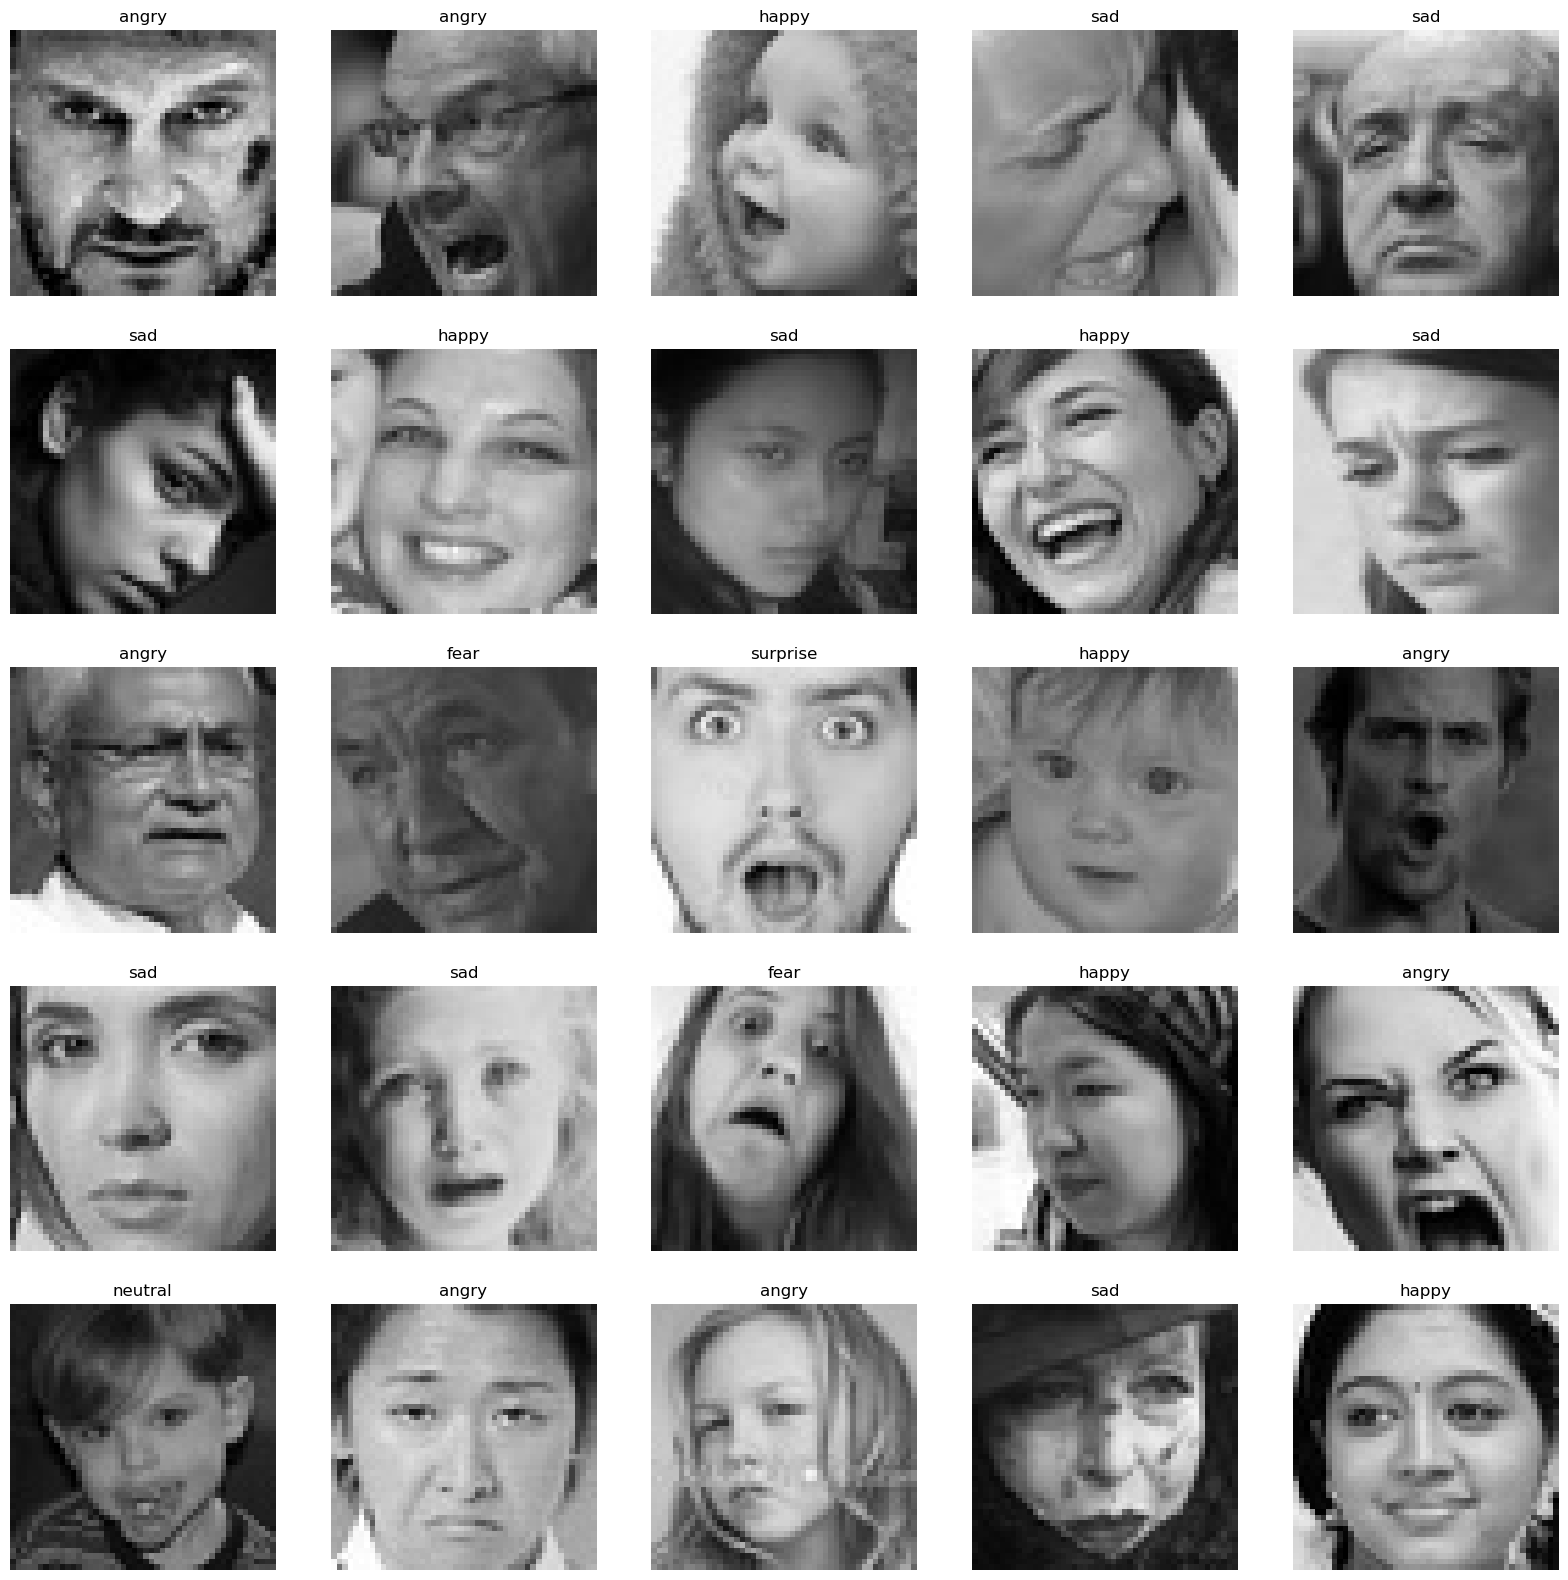

In [56]:
# to display grid of images
plt.figure(figsize=(20,20))
files = train.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

PREPROCESS IMAGE FEATURES

In [24]:
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
from tqdm import tqdm

def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale', target_size=(48, 48))
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1) #Reshapes the 3D NumPy array (len(features), 48, 48) into a 4D array of shape (num_images, height, width, channels)
    return features



In [26]:
train_features = extract_features(train['image'])

100%|██████████| 28709/28709 [13:28<00:00, 35.51it/s]


In [27]:
test_features = extract_features(test['image'])

100%|██████████| 7178/7178 [02:58<00:00, 40.30it/s]


In [28]:
## normalize the image
x_train = train_features/255.0
x_test = test_features/255.0

In [29]:
## convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [30]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [31]:
y_train[5]

array([0., 0., 0., 1., 0., 0., 0.])

In [32]:
# config
input_shape = (48, 48, 1)
output_class = 7

MODEL


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()
# Convolutional layers
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# Output layer
model.add(Dense(output_class, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])  # Fixed metrics argument


In [92]:
# train the model
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 353s 2s/step - accuracy: 0.6563 - loss: 0.9088 - val_accuracy: 0.6223 - val_loss: 1.0231
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 327s 1s/step - accuracy: 0.6604 - loss: 0.9049 - val_accuracy: 0.6229 - val_loss: 1.0187
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 328s 1s/step - accuracy: 0.6655 - loss: 0.8945 - val_accuracy: 0.6159 - val_loss: 1.0304
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 330s 1s/step - accuracy: 0.6608 - loss: 0.9102 - val_accuracy: 0.6166 - val_loss: 1.0207
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 341s 2s/step - accuracy: 0.6639 - loss: 0.9075 - val_accuracy: 0.6195 - val_loss: 1.0241
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 315s 1s/step - accuracy: 0.6666 - loss: 0.8889 - val_accuracy: 0.6211 - val_loss: 1.0213
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 310s 1s/step - accuracy: 0.6691 - loss: 0.8820 - val_accuracy: 0.6226 - val_loss: 1.0183
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 321s 1s/step - accuracy: 0.6730 - loss: 0.8778 - 

PLOT

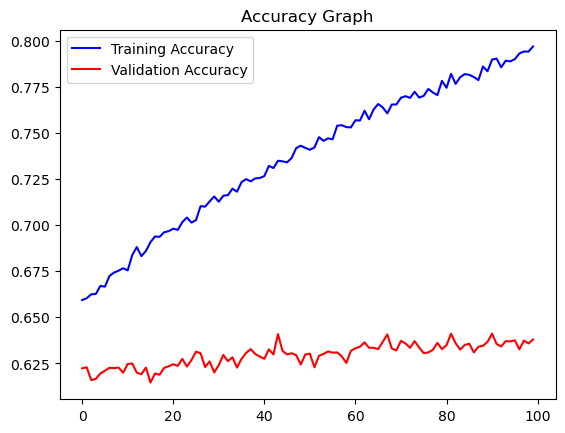

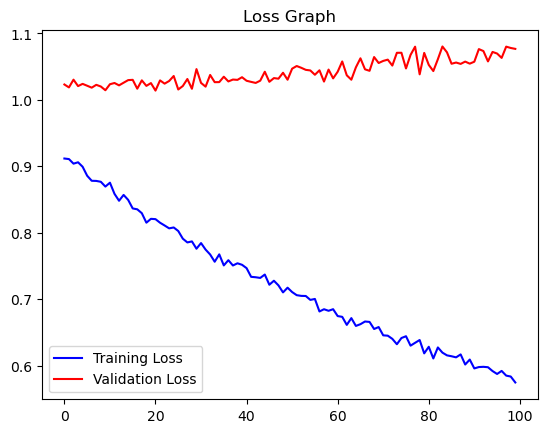

In [95]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()

TEST

Original Output: neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
Predicted Output: neutral


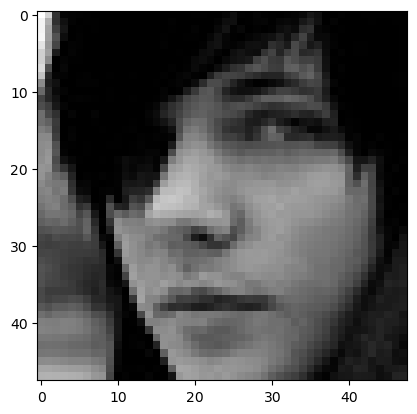

In [118]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Predicted Output: neutral


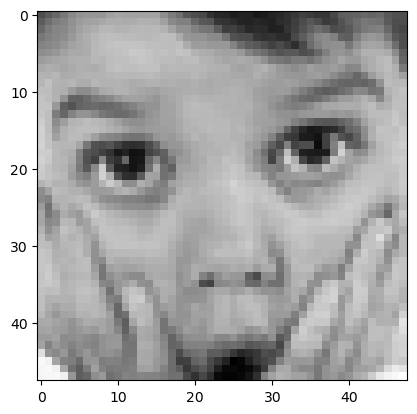

In [120]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');